<a href="https://colab.research.google.com/github/RCutrino/MLPNS_RCutrino/blob/main/my_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl

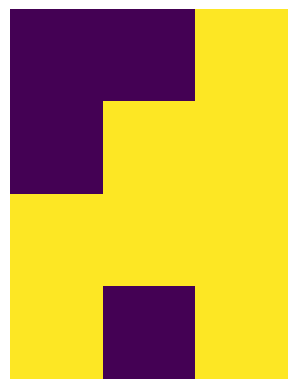

In [2]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,1,1],
              [1,0,1]])
pl.imshow(X)
pl.axis('off');

In [3]:
y= np.array([[0,1,1,0]]).T

In [4]:
print('input\n',X)
print('output\n',y)

input
 [[0 0 1]
 [0 1 1]
 [1 1 1]
 [1 0 1]]
output
 [[0]
 [1]
 [1]
 [0]]


# basic architecture: 1 layer
4 osservazioni\
3 neuroni\
1 layer

In [5]:
def sigmoid(x):
  return 1./(1. + np.exp(-x))

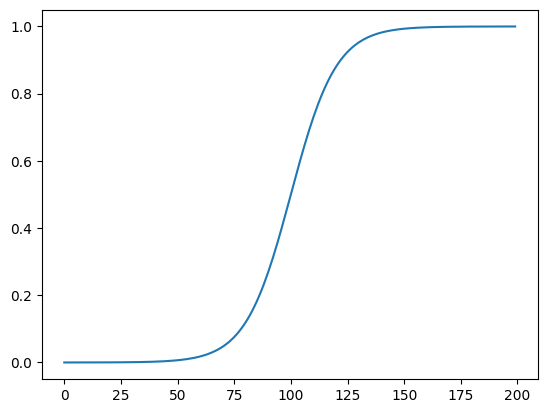

In [6]:
pl.plot(sigmoid(np.arange(-10,10,0.1)));

In [7]:
def loss(prediction,target):
  return target-prediction

In [8]:
def dsigmoid(x):
  return sigmoid(x)* (1.-sigmoid(x))

## Neural network

In [9]:
np.random.seed(302)

In [10]:
#ottimizzazione operativa
training = 6000

In [11]:
#layer of synopses/neurons
syn0 = 2 * np.random.random((3,1))-1
syn0

array([[ 0.27256242],
       [ 0.65008468],
       [-0.31671053]])

In [12]:
loss_output=[]
for iter in range(training):
  inputLayer = X
  #forward propagation
  
  #linear regression
  l1 = np.dot(inputLayer, syn0)
  #activations
  output = sigmoid(l1)
  #error
  output_error = loss(output,y)
  loss_output.append(np.abs(output_error).sum())

  #backward propagation

  #correction
  output_delta = output_error * dsigmoid(output)
   #apply correction to weights
  syn0 += np.dot(inputLayer.T, output_delta)

  print('output after training\n', output)
  print('output target\n',y)

Output streaming troncato alle ultime 5000 righe.
output after training
 [[1.31364804e-03]
 [9.99258918e-01]
 [9.98887220e-01]
 [8.74913618e-04]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[1.31340866e-03]
 [9.99259053e-01]
 [9.98887423e-01]
 [8.74754260e-04]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[1.31316936e-03]
 [9.99259188e-01]
 [9.98887625e-01]
 [8.74594961e-04]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[1.31293015e-03]
 [9.99259323e-01]
 [9.98887828e-01]
 [8.74435720e-04]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[1.31269102e-03]
 [9.99259457e-01]
 [9.98888030e-01]
 [8.74276537e-04]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[1.31245198e-03]
 [9.99259592e-01]
 [9.98888233e-01]
 [8.74117411e-04]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[1.31221303e-03]
 [9.99259727e-01]
 [9.98888435e-01]
 [8.73958344e-04]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[1

Text(0, 0.5, 'global loss')

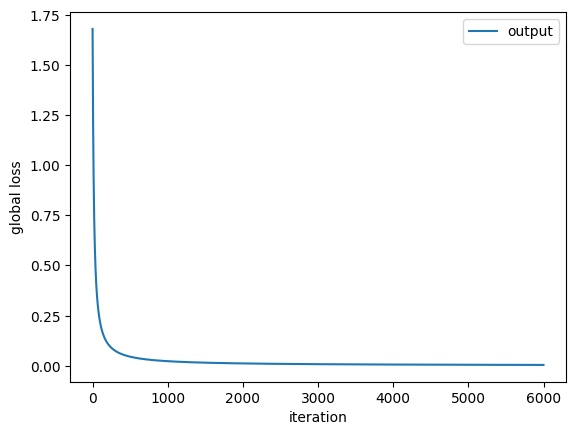

In [13]:
pl.plot(loss_output, label='output')
pl.legend()
pl.xlabel('iteration')
pl.ylabel('global loss')

#2 Layer Neural Network:
Abbiamo sempre la struttura di prima, ovverosia prendiamo come activation function la sigmoid già definita e come numero massimo di iterazioni 6000. Ripartiamo dall'architettura, vedendo di definire il livello 2

Ho due livelli:

INPUT

LAYER 1 -> 3 NEURONS

LAYER 2 -> 5 NEURONS

OUTPUT

In [14]:
np.random.seed(302)
syn0 = 2 * np.random.random((3,5))-1
syn1 = 2 * np.random.random((5,1))-1

loss_output =[]
loss_hidden=[]

for iter in range(training):
  inputLayer= X

  #forward propagation
  l1=np.dot(inputLayer,syn0)
  hidden= sigmoid(l1)
  hidden_error=loss(hidden,y)

  l2=np.dot(l1,syn1)

  #activation
  output=sigmoid(l2)

  #error
  output_error=loss(output,y)
  loss_output.append(np.abs(output_error).sum())

  #backward propagation

  output_delta=output_error * sigmoid(output)

  #error on the first layer
  hidden_error=output_delta.dot(syn1.T)
  loss_hidden.append(np.abs(hidden_error).sum())
  hidden_delta=hidden_error * sigmoid(hidden)


  #applay correction to weights

  syn0 += np.dot(inputLayer.T,hidden_delta)
  syn1 += np.dot(hidden.T,output_delta)

  print('output after training\n',output)
  print('output target\n',y)

Output streaming troncato alle ultime 5000 righe.
output after training
 [[3.40446638e-05]
 [9.99987954e-01]
 [9.99981358e-01]
 [2.19990857e-05]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[3.40378266e-05]
 [9.99987956e-01]
 [9.99981362e-01]
 [2.19946918e-05]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[3.40309921e-05]
 [9.99987959e-01]
 [9.99981366e-01]
 [2.19902996e-05]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[3.40241602e-05]
 [9.99987961e-01]
 [9.99981369e-01]
 [2.19859090e-05]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[3.40173309e-05]
 [9.99987964e-01]
 [9.99981373e-01]
 [2.19815201e-05]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[3.40105042e-05]
 [9.99987966e-01]
 [9.99981377e-01]
 [2.19771329e-05]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[3.40036802e-05]
 [9.99987968e-01]
 [9.99981380e-01]
 [2.19727474e-05]]
output target
 [[0]
 [1]
 [1]
 [0]]
output after training
 [[3

Text(0, 0.5, 'global loss')

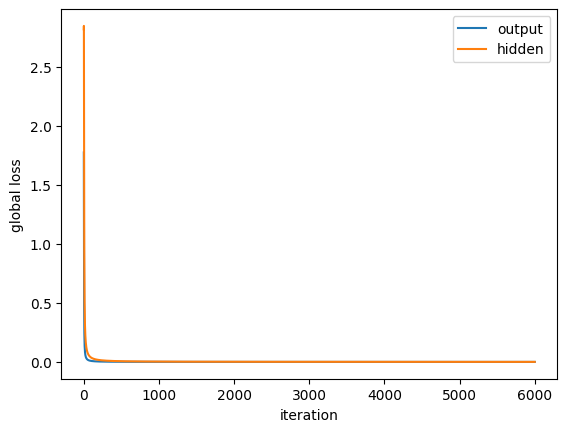

In [15]:
pl.plot(loss_output, label='output')
pl.plot(loss_hidden, label='hidden')
pl.legend()
pl.xlabel('iteration')
pl.ylabel('global loss')

#2 Layer Neural Network con Tensorflow
Usiamo un Python Package classico per fare i neural network.

In [16]:
from tensorflow import keras

#keras è il pacchetto che contiene la struttura per fare modelli
#neurali ed altri modelli di ottimizzazione e visualizzazione
#altro pacchetto molto comune è pytorch (forse quando facciamo i 
#transformers lo scriviamo con lui)

In [17]:
#creo i miei layers con il modello del multi-layer perceptron
#il tipo di layer che usiamo è Dense

#creo l'hidden layer 3 neuroni in input e 5 neuroni in output
hlayer = keras.layers.Dense(5, input_dim=3, activation="sigmoid")
#creo l'output layer 
olayer = keras.layers.Dense(1, activation="linear")

#creo un neural network senza loops
#gli metto dentro i miei layers
model = keras.Sequential([hlayer, olayer])

#visualizzo una tabella che mi da il numero di parametri
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [18]:
#faccio compilare il mio modello
#do le mie scelte architettoniche, ad esempio come loss function uso
#mae = mean absolute error
#scelgo qual'è il gradient descent algorith che uso per fare l'ottimizzazione
#uno dei più comuni è adam
#segnalo al compilatore che metrica utilizzare, ed uso l'accuracy o il mae

#questi sono tutti hyperparameters che eventualmente posso cambiare

model.compile(loss = "mae", optimizer="adam", metrics=["accuracy", "mae"])

In [19]:
#in questo esercizio non ho alcun training set né alcun test set, è solo
#per vedere la sintassi di ciò che usiamo

#fittiamo il modello sui dati
#scelgo quanti steps dare con epochs=1000

model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.4257 - accuracy: 0.5000 - mae: 0.4257
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.4249 - accuracy: 0.5000 - mae: 0.4249
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.4242 - accuracy: 0.5000 - mae: 0.4242
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.4235 - accuracy: 0.5000 - mae: 0.4235
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.4228 - accuracy: 0.5000 - mae: 0.4228
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.4220 - accuracy: 0.5000 - mae: 0.4220
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.4213 - accuracy: 0.5000 - mae: 0.4213
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.4206 - accuracy: 0.5000 - mae: 0.4206
Epoch 9/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.4198 - accuracy: 0.5000

In [20]:
#notiamo che dopo 1000 epochs ho accuracy al 100%, è un buon monitoraggio

model.predict(X)

1/1 [==============================] - 0s 287ms/step


array([[ 4.1446090e-04],
       [ 9.9935830e-01],
       [ 1.0004714e+00],
       [-4.1499734e-04]], dtype=float32)

In [21]:
y

array([[0],
       [1],
       [1],
       [0]])